In [1]:
import torch
from data import VQA
import utils
import config
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import data
import numpy as np
import json

In [2]:
folder_image = '/media/huynhtruc0309/Data/HCMUS/THESIS/Dataset/VQA_2.0/val2014'
results = torch.load('2017-08-04_00.55.19.pth', map_location='cpu')
with open('vocab.json') as f:
    vocab = json.load(f)

# Load question
train, val, test = False, True, False
vqa_dataset = VQA(utils.path_for(train=train, val=val, test=test, question=True),
                  utils.path_for(train=train, val=val, test=test, answer=True),
                  'resnet-14x14.h5',
                  answerable_only=train)

# Load image
transform = utils.get_transform(config.image_size, config.central_fraction)
coco_dataset = data.CocoImages(config.val_path, transform=transform)

# Get predict
answers = np.asarray(results['eval']['answers'])
accuracies = np.asarray(results['eval']['accuracies'])
idxs = np.asarray(results['eval']['idx'])

found 40504 images in /media/huynhtruc0309/Data/HCMUS/THESIS/Dataset/VQA_2.0/val2014


/home/huynhtruc0309/anaconda3/lib/python3.7/site-packages/torchvision/transforms/transforms.py:256: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [3]:
vqa_dataset.max_question_length

23

In [29]:
for id in range(100):
    if 'Why' in (vqa_dataset.raw_questions[id]):
        print(

What is the table made of?
Is the food napping on the table?
What has been upcycled to make lights?
Is this an Spanish town?
Are there shadows on the sidewalk?
What is in the top right corner?
Is it cold outside?
What is leaning against the house?
How many windows can you see?
Is this in a park?
Is there a bicycle in this picture?
Is the person feeding the birds?
Is this a Girl Scout?
What uniform is she wearing?
What color is the fence?
What color is the linoleum?
Is the water running in the sink?
How is the floor made?
What is the teddy bear sitting on?
Do children like this object?
What is written on the teddy bear's feet?
Is the weather warm in this picture?
How many people are in this photo?
Why would the snowmobiler be riding up the mountain for the skier?
How many people can the red buses hold?
Are the red buses identical?
How many double-decker buses are in the picture?
Where is this picture?
How many fruits and veggies are there?
How many boxes of green apples are there?
What 

In [4]:
def get_key(val, my_dict):
    for key, value in my_dict.items():
        if val == value:
            return key
        
def get_top_predict(answers, confidence, K):
    predicts_id = np.argsort(confidence)[-K:]
    top_confidence = [confidence[i] for i in predicts_id]
    top_answers = [get_key(answers[i], vocab['answer']) for i in predicts_id]
    return top_answers, top_confidence

def show(id):
    print(f'Id: {id}, File name: {image_path}')
    print(f'Question: {vqa_dataset.raw_questions[id]}')
    
    K = 5
    (ans, conf) = get_top_predict(answers[3000*id:3000*(id+1)], accuracies[3000*id:3000*(id+1)], K)
    for a, c in zip(ans, conf):
        print(f'Answer: {a} {c}')
        
    print(f'Ground Truth: {vqa_dataset.raw_answers[id]}')

## Test 1

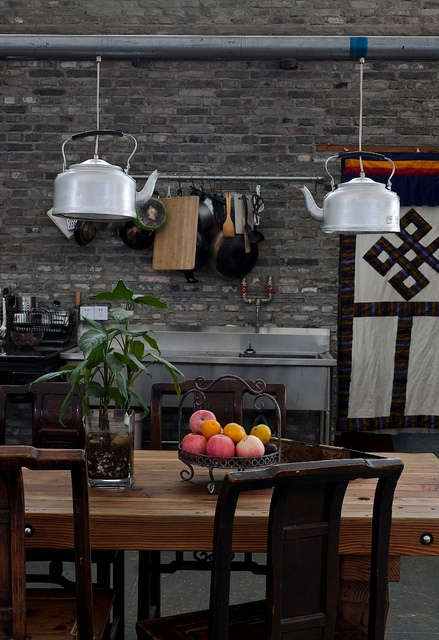

In [5]:
id = 1
coco_idx = vqa_dataset.coco_ids[id]
image_path = coco_dataset.id_to_filename[coco_idx]
image_path = Path(folder_image).joinpath(image_path)
Image.open(image_path)

In [6]:
show(id)

Id: 1, File name: /media/huynhtruc0309/Data/HCMUS/THESIS/Dataset/VQA_2.0/val2014/COCO_val2014_000000350623.jpg
Question: Is the food napping on the table?
Answer: yes 1.0
Answer: yes 1.0
Answer: warm 1.0
Answer: no 1.0
Answer: yes 1.0
Ground Truth: ['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no']


## Test 2

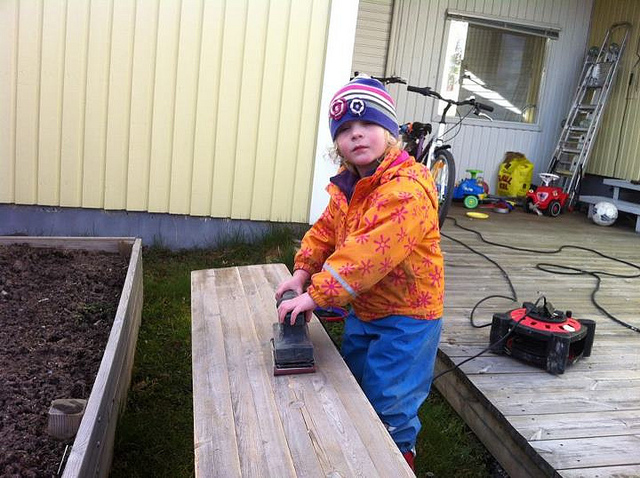

In [15]:
id = 6
coco_idx = vqa_dataset.coco_ids[id]
image_path = coco_dataset.id_to_filename[coco_idx]
image_path = Path(folder_image).joinpath(image_path)
Image.open(image_path)

In [16]:
show(id)

Id: 6, File name: /media/huynhtruc0309/Data/HCMUS/THESIS/Dataset/VQA_2.0/val2014/COCO_val2014_000000434410.jpg
Question: Is it cold outside?
Answer: tennis 1.0
Answer: surfing 1.0
Answer: no 1.0
Answer: yes 1.0
Answer: no 1.0
Ground Truth: ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes']


## Test 3

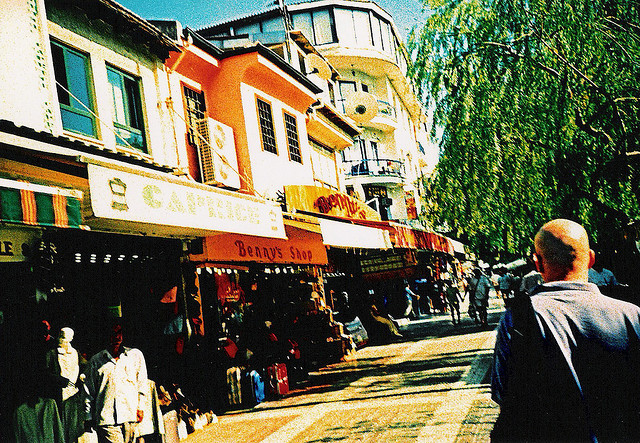

In [9]:
id = 3
coco_idx = vqa_dataset.coco_ids[id]
image_path = coco_dataset.id_to_filename[coco_idx]
image_path = Path(folder_image).joinpath(image_path)
Image.open(image_path)

In [10]:
show(id)

Id: 3, File name: /media/huynhtruc0309/Data/HCMUS/THESIS/Dataset/VQA_2.0/val2014/COCO_val2014_000000008647.jpg
Question: Is this an Spanish town?
Answer: yes 1.0
Answer: female 1.0
Answer: pizza 1.0
Answer: yellow and blue 1.0
Answer: yes 1.0
Ground Truth: ['yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'no']


## Test 4

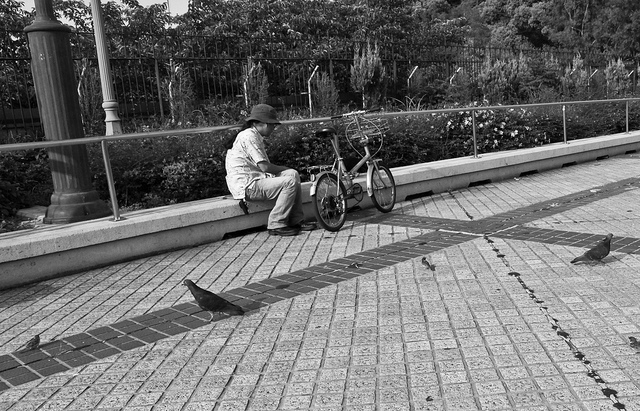

In [19]:
id = 9
coco_idx = vqa_dataset.coco_ids[id]
image_path = coco_dataset.id_to_filename[coco_idx]
image_path = Path(folder_image).joinpath(image_path)
Image.open(image_path)

In [20]:
show(id)

Id: 9, File name: /media/huynhtruc0309/Data/HCMUS/THESIS/Dataset/VQA_2.0/val2014/COCO_val2014_000000056205.jpg
Question: Is this in a park?
Answer: canada 1.0
Answer: 2 1.0
Answer: no 1.0
Answer: green 1.0
Answer: no 1.0
Ground Truth: ['yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes']


## Test 5

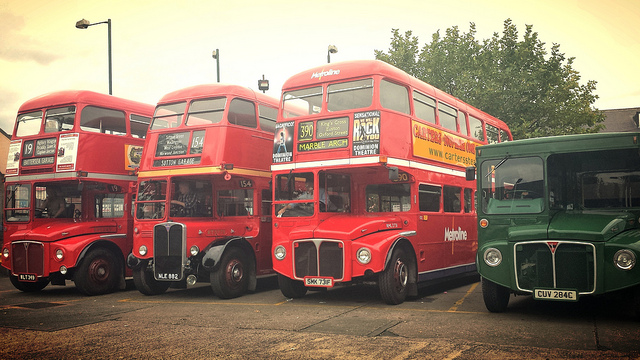

In [26]:
id = 25
coco_idx = vqa_dataset.coco_ids[id]
image_path = coco_dataset.id_to_filename[coco_idx]
image_path = Path(folder_image).joinpath(image_path)
Image.open(image_path)

In [27]:
show(id)

Id: 25, File name: /media/huynhtruc0309/Data/HCMUS/THESIS/Dataset/VQA_2.0/val2014/COCO_val2014_000000036012.jpg
Question: Are the red buses identical?
Answer: laptop 1.0
Answer: yes 1.0
Answer: yes 1.0
Answer: 2 1.0
Answer: yes 1.0
Ground Truth: ['yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes']


In [ ]:
# 0 <= id < len(idx)
id = idx[0]

In [ ]:
coco_idx = vqa_dataset.coco_ids[id]
image_path = coco_dataset.id_to_filename[coco_idx]
image_path = Path('/media/huynhtruc0309/Data/HCMUS/THESIS/Dataset/VQA_2.0/val2014').joinpath(image_path)
Image.open(image_path)

In [ ]:
print(f'Id: {id}')
print(f'Question: {vqa_dataset.raw_questions[id]}')
print(f'Answers: {vqa_dataset.raw_answers[id]}')

In [ ]:
for id in idx[:50]:
    print(f'Question: {vqa_dataset.raw_questions[id]}')
    print(f'Answers: {vqa_dataset.raw_answers[id]}')